In [1]:
from fpl_helpers import *
import pandas as pd

In [2]:
elements_df, teams_df = get_tables()
global PLAYER_IDS
PLAYER_IDS = elements_df[['full_name', 'id']].set_index('full_name').to_dict()['id']


In [3]:
forwards = elements_df[(elements_df['minutes']>0) & (elements_df['element_type']==4)].sort_values(by='total_points', ascending=False)[PLAYER_COLS].head(20)
forwards['difficulty'] = forwards['full_name'].apply(lambda x: difficulty_range(PLAYER_IDS[x], end_gameweek=3, gwrange=1))
forwards[:10]

,full_name,team,selected_by_percent,now_cost,value_season,total_points,expected_goals,goals_scored,expected_assists,assists,expected_goals_conceded,goals_conceded,difficulty
433,Erling Haaland,Man City,91.8,141,2.8,39,4.54,6,0.18,1,2.70,2,"[3.0, 2.0, 2.0]"
422,Julián Álvarez,Man City,12.7,67,4.2,28,1.94,2,0.59,3,2.77,2,"[3.0, 2.0, 2.0]"
534,Taiwo Awoniyi,Nott'm Forest,4.3,66,3.8,25,1.83,3,0.29,1,5.30,4,"[2.0, 5.0, 3.0]"
144,Evan Ferguson,Brighton,7.2,59,4.2,25,2.56,4,0.11,0,5.50,4,"[4.0, 2.0, 3.0]"
128,Yoane Wissa,Brentford,16.8,62,3.9,24,2.46,2,0.08,1,4.20,5,"[4.0, 2.0, 2.0]"
263,Odsonne Edouard,Crystal Palace,2.3,55,4.4,24,2.49,3,0.24,0,3.83,3,"[3.0, 2.0, 4.0]"
353,Darwin Núñez Ribeiro,Liverpool,10.4,73,2.9,21,1.70,2,0.12,2,1.49,0,"[2.0, 2.0, 3.0]"
89,Dominic Solanke,Bournemouth,2.6,65,3.2,21,1.76,2,0.21,1,9.50,8,"[3.0, 3.0, 4.0]"
11,Eddie Nketiah,Arsenal,7.0,56,3.6,20,1.54,2,0.19,1,1.92,2,"[2.0, 3.0, 2.0]"
643,Michail Antonio,West Ham,5.6,61,3.1,19,0.95,2,0.35,0,4.94,1,"[5.0, 4.0, 2.0]"


In [4]:
compare_players(forwards[1:10]['full_name'], metrics=ATTACKER_METRICS, agg='mean')

,Julián Álvarez,Taiwo Awoniyi,Evan Ferguson,Yoane Wissa,Odsonne Edouard,Darwin Núñez Ribeiro,Dominic Solanke,Eddie Nketiah,Michail Antonio
Total Points,7.00,6.20,6.20,6.00,6.00,5.20,5.20,5.00,4.80
Goals Scored,0.50,0.80,1.00,0.50,0.80,0.50,0.50,0.50,0.50
Expected Goals,0.50,0.50,0.60,0.60,0.60,0.40,0.40,0.40,0.20
Assists,0.80,0.20,0.00,0.20,0.00,0.50,0.20,0.20,0.00
Expected Assists,0.10,0.10,0.00,0.00,0.10,0.00,0.10,0.00,0.10
Expected Goal Involvements,0.60,0.50,0.70,0.60,0.70,0.50,0.50,0.40,0.30
Bonus,1.00,0.80,0.80,1.20,1.00,0.80,0.50,0.50,1.00
Bps,29.00,24.80,25.80,17.50,20.50,18.50,14.50,16.00,17.20
Influence,29.00,30.60,37.00,21.00,30.20,20.30,25.80,16.80,21.40
Creativity,42.60,12.10,4.70,6.80,9.80,3.70,16.90,17.00,5.40


In [27]:
sterling = fetch_player_data(PLAYER_IDS["Raheem Sterling"])
salah = fetch_player_data(PLAYER_IDS["Mohamed Salah"])
son = fetch_player_data(PLAYER_IDS["Son Heung-min"])

In [30]:
pd.Series(data=[i['total_points'] for i in sterling['history_past']], index=[i['season_name'] for i in sterling['history_past']], name='Raheem Sterling')

2011/12      3
2012/13     82
2013/14    132
2014/15    158
2015/16     96
2016/17    149
2017/18    229
2018/19    234
2019/20    204
2020/21    154
2021/22    163
2022/23    101
Name: Raheem Sterling, dtype: int64

<Axes: title={'left': 'Total FPL points development for Sterling, Salah and Son'}, xlabel='Season', ylabel='Total FPL points'>

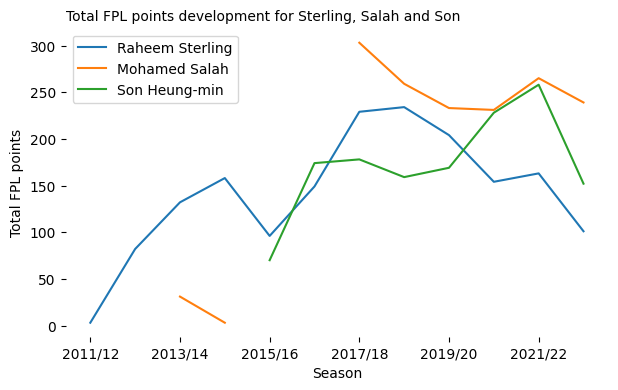

In [42]:

sterling_points = pd.Series(data=[i['total_points'] for i in sterling['history_past']], index=[i['season_name'] for i in sterling['history_past']], name='Raheem Sterling')
salah_points = pd.Series([i['total_points'] for i in salah['history_past']], index=[i['season_name'] for i in salah['history_past']], name='Mohamed Salah')
son_points = pd.Series([i['total_points'] for i in son['history_past']], index=[i['season_name'] for i in son['history_past']], name='Son Heung-min')

df = pd.concat([sterling_points, salah_points, son_points], axis=1)
ax = df.plot(figsize=(7,4))
format_chart(ax, ylabel='Total FPL points', xlabel='Season', title="Total FPL points development for Sterling, Salah and Son")

In [2]:
import pandas as pd


# Base path for the CSV files
base_path = 'Fantasy-Premier-League/data/2022-23/gws/'

data = pd.read_csv(base_path + 'merged_gw.csv')


<Axes: ylabel='name'>

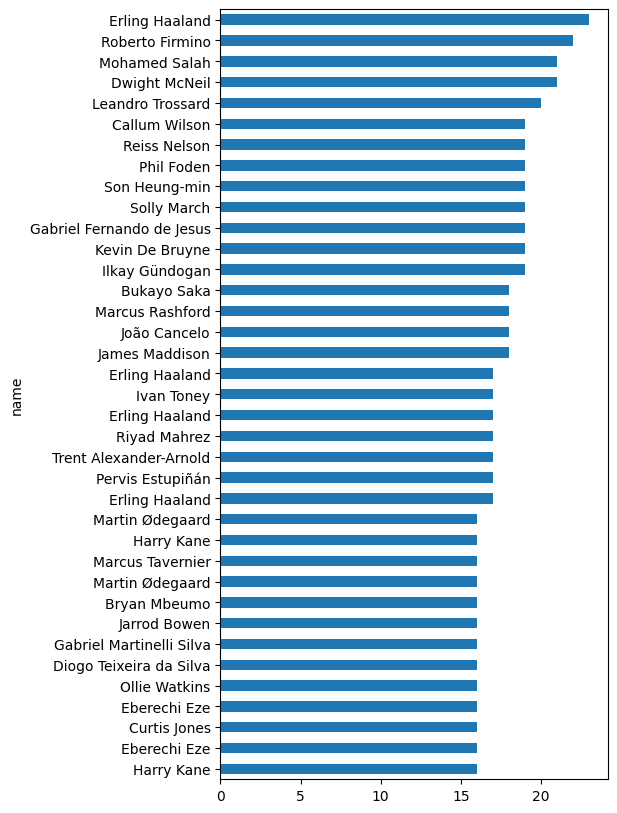

In [23]:
reduced = data[['name', 'total_points', 'GW']]
reduced[reduced['total_points']>15].set_index('name')['total_points'].sort_values().plot.barh(figsize=(5,10))